In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

import re
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("imdb_animated_movies_clean.csv")
df.head()

,name,rating,year,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,...,worldwide_gross_usd,na_gross_usd,opening_weekend_usd,budget_est_usd,orig_bgt_currency,profit_usd,directors,director_count,writers,writer_count
0,9,PG-13,2009,79,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",6,A rag doll that awakens in a postapocalyptic f...,15,65.0,70.0,...,4842806,3174989,1074044,4200000,usd,642806,Shane Acker,1,"Pamela Pettler, Shane Acker, Ben Gluck",3
1,A Bug's Life,G,1998,95,"Adventure, Comedy, Family, Fantasy",4,"A misfit ant, looking for ""warriors"" to save h...",27,74.5,72.0,...,36325885,16279856,29112,16800000,usd,19525885,"John Lasseter, Andrew Stanton",2,"John Lasseter, Andrew Stanton, Joe Ranft",3
2,A Christmas Carol,PG,2009,96,"Adventure, Comedy, Drama, Family, Fantasy",5,An animated retelling of Charles Dickens' clas...,24,61.5,68.0,...,32528664,13785586,3005107,28000000,usd,4528664,Robert Zemeckis,1,"Charles Dickens, Robert Zemeckis",2
3,A Goofy Movie,G,1995,78,"Adventure, Comedy, Family, Musical, Romance",5,When Max makes a preposterous promise to a gir...,34,61.0,69.0,...,3534859,3534859,612955,2520000,usd,1014859,Kevin Lima,1,"Jymn Magon, Chris Matheson, Brian Pimental",3
4,A Scanner Darkly,R,2006,100,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",6,An undercover cop in a not-too-distant future ...,24,71.5,70.0,...,765991,550161,39167,1218000,usd,-452009,Richard Linklater,1,"Philip K. Dick, Richard Linklater",2


In [2]:
df.columns

Index(['name', 'rating', 'year', 'runtime_minutes', 'genres', 'genre_count',
       'story_desc', 'story_word_count', 'avg_rating_score', 'votescore',
       'metacritic', 'prod_company_count', 'production_companies',
       'aspect_ratio', 'production_countries', 'country_count', 'languages',
       'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'orig_bgt_currency', 'profit_usd', 'directors',
       'director_count', 'writers', 'writer_count'],
      dtype='object')

In [3]:
def check_boxoffice(b, p, w, n, o, r):
    if (b | p | w | n | o == -1) or "TV" in r:
        return 0
    return 1

In [4]:
df.insert(len(df.columns),'box_office',False)
df['box_office'] = df.apply(lambda x: check_boxoffice(x['budget_est_usd'], x['profit_usd'], 
                                                               x['worldwide_gross_usd'], x['na_gross_usd'], 
                                                               x['opening_weekend_usd'], x['rating']),axis=1)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [6]:
num_df.columns

Index(['year', 'runtime_minutes', 'genre_count', 'story_word_count',
       'avg_rating_score', 'votescore', 'metacritic', 'prod_company_count',
       'country_count', 'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'profit_usd', 'director_count', 'writer_count',
       'box_office'],
      dtype='object')

<AxesSubplot:>

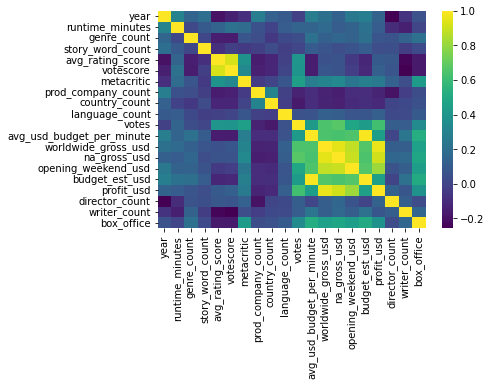

In [7]:
sns.heatmap(num_df.corr(), annot = False, cmap = 'viridis')

0.21161421177804676
0.17112019488007074
0.37258389022157795
0.25840858745011824


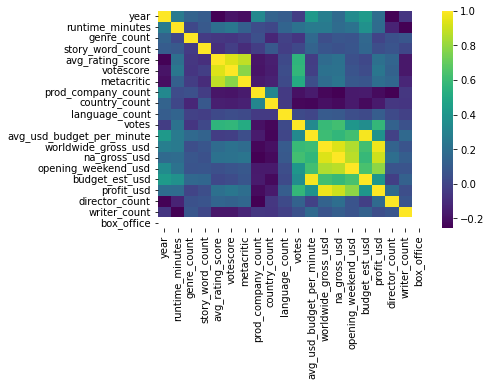

In [8]:
df_validBO = df[df['box_office'] == True]

sns.heatmap(df_validBO.corr(), annot = False, cmap = 'viridis')

print(df['budget_est_usd'].corr(df['runtime_minutes']))
print(df['worldwide_gross_usd'].corr(df['runtime_minutes']))
print(df_validBO['budget_est_usd'].corr(df_validBO['runtime_minutes']))
print(df_validBO['worldwide_gross_usd'].corr(df_validBO['runtime_minutes']))

### Runtime and Rating

Runtime within all movies


<AxesSubplot:xlabel='runtime_minutes'>

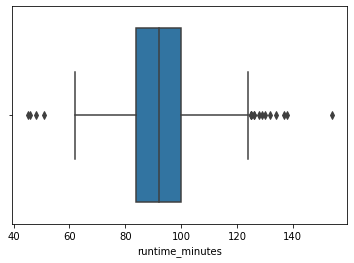

In [9]:
print("Runtime within all movies")
sns.boxplot(x=df['runtime_minutes'])

Within rating


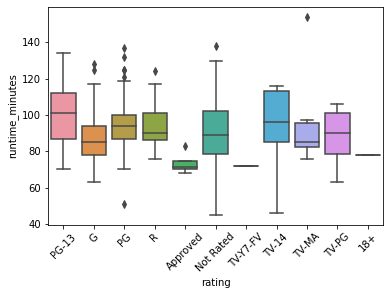

In [10]:
print("Within rating")
sns.boxplot(data=df ,y='runtime_minutes', x='rating')
plt.tick_params(axis='x', rotation=45)
plt.show()

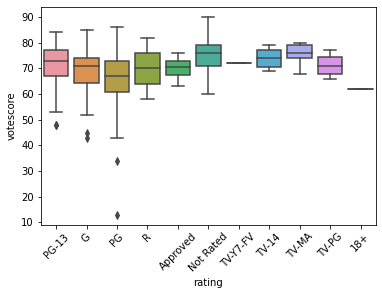

In [116]:
sns.boxplot(data=df ,y='votescore', x='rating')
plt.tick_params(axis='x', rotation=45)
plt.show()

Runtime of movies (box office only)


<AxesSubplot:xlabel='runtime_minutes'>

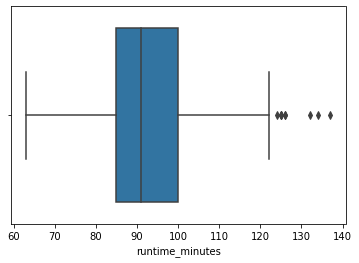

In [11]:
print("Runtime of movies (box office only)")
sns.boxplot(x=df_validBO['runtime_minutes'])

Runtime of movies (box office only) within rating


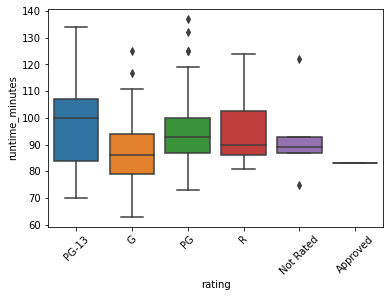

In [12]:
print("Runtime of movies (box office only) within rating")
sns.boxplot(data=df_validBO ,y='runtime_minutes', x='rating')
plt.tick_params(axis='x', rotation=45)
plt.show()

#### Shortest and longest movie

In [13]:
shortest_movie = df['runtime_minutes'].idxmin()
df.iloc[shortest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

runtime_minutes                                 45
name               To the Forest of Firefly Lights
year                                          2011
genres                              Drama, Fantasy
budget_est_usd                                  -1
Name: 156, dtype: object

In [14]:
longest_movie = df['runtime_minutes'].idxmax()
df.iloc[longest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

runtime_minutes                                        154
name               Evangelion: 3.0+1.01 Thrice Upon a Time
year                                                  2021
genres                               Action, Drama, Sci-Fi
budget_est_usd                                          -1
Name: 309, dtype: object

#### Shortest and longest movie in box office

In [15]:
shortest_movie = df_validBO['runtime_minutes'].idxmin()
df.iloc[shortest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

runtime_minutes                                                   63
name                                                 Winnie the Pooh
year                                                            2011
genres             Adventure, Comedy, Drama, Family, Fantasy, Mus...
budget_est_usd                                               4200000
Name: 464, dtype: object

In [16]:
longest_movie = df_validBO['runtime_minutes'].idxmax()
df.iloc[longest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

runtime_minutes                                137
name               The Tale of The Princess Kaguya
year                                          2013
genres                      Drama, Family, Fantasy
budget_est_usd                            36000000
Name: 183, dtype: object

### Genre

In [17]:
df['genres']

0      Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...
1                     Adventure, Comedy, Family, Fantasy
2              Adventure, Comedy, Drama, Family, Fantasy
3            Adventure, Comedy, Family, Musical, Romance
4        Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller
                             ...                        
469           Adventure, Comedy, Family, Fantasy, Sci-Fi
470                  Adventure, Comedy, Fantasy, Musical
471                            Adventure, Comedy, Family
472            Adventure, Comedy, Crime, Family, Mystery
473                               Drama, Family, Fantasy
Name: genres, Length: 474, dtype: object

In [18]:
import itertools

words = set(df['genres'].str.findall("[\w.\-]+").sum())
genres = set(words)
# g_list = list(genres)

In [19]:
print(list(genres))

['Fantasy', 'Western', 'Musical', 'Mystery', 'Biography', 'Music', 'Adventure', 'Sport', 'History', 'War', 'Drama', 'Horror', 'Sci-Fi', 'Action', 'Comedy', 'Crime', 'Thriller', 'Romance', 'Family']


In [20]:
# colors = ['pink', 'violet', 'rosybrown', 'darkblue', 'green', 'drimgray', 'firebrick','orange','goldenrod','lightsteelblue','tan',
#     'indigo','darkseagreen', 'whitesmoke', 'darkslategray', 'brown','thistle','hotpink','sienna']

# color_code = {g_list[i]: colors[i] for i in range(len(g_list))}

In [21]:
genre_dict = {}
for x in genres:
    genre_dict[x] = 0
for x in df['genres']:
    for y in x.split(', '):
        genre_dict[y] += 1

In [22]:
genre_dict

{'Fantasy': 278,
 'Western': 4,
 'Musical': 94,
 'Mystery': 40,
 'Biography': 2,
 'Music': 22,
 'Adventure': 374,
 'Sport': 13,
 'History': 5,
 'War': 10,
 'Drama': 147,
 'Horror': 25,
 'Sci-Fi': 130,
 'Action': 122,
 'Comedy': 305,
 'Crime': 34,
 'Thriller': 34,
 'Romance': 61,
 'Family': 355}

In [23]:
df[{'genres','votescore'}].head(5)

,genres,votescore
0,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",70.0
1,"Adventure, Comedy, Family, Fantasy",72.0
2,"Adventure, Comedy, Drama, Family, Fantasy",68.0
3,"Adventure, Comedy, Family, Musical, Romance",69.0
4,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",70.0


In [24]:
df.loc[df['metacritic'] > 1, ['metacritic']]

,metacritic
0,60.0
1,77.0
2,55.0
3,53.0
4,73.0
...,...
469,72.0
470,79.0
471,35.0
472,78.0


In [25]:
# def avg_votescore_by_keys(df, column, keys, freq):
#     score_by_col = {}
#     for x in range(len(df[{column,'votescore'}])):
#         for k in keys:
#             if k in df[column][x].split(', '):
#                 val = score_by_col.get(k,0)
#                 score_by_col[k] = val + df['votescore'][x]
#     for k in range(len(keys)):
#         score_by_col[keys[k]] = (score_by_col[keys[k]] / freq[k]).round(3)
    
#     return score_by_col

In [26]:
def avg_score_by_keys(df, column, keys, auto_calc=True):
    score_by_col = {}
    mc_by_col = {}
    counter_a, counter_b  = {}, {}
    
    for x in range(len(df[{column,'votescore','metacritic'}])):
        for k in keys:
            if k in df[column][x].split(', '):
                counter_a[k] = counter_a.get(k,0)
                
                val = score_by_col.get(k,0)

                score_by_col[k] = val + df['votescore'][x]
                counter_a[k] = counter_a.get(k) + 1
#                 print(f'{counter_a[k]} - {k}')
                if df['metacritic'][x] < 0:
                    continue
                else:
                    val_m = mc_by_col.get(k,0)
                    counter_b[k] = counter_b.get(k,0)
                    mc_by_col[k] = val_m + df['metacritic'][x]
                    counter_b[k] = counter_b.get(k) + 1

#     print(f'val:{val}, counter_a:{counter_a}')
#     print(mc_by_col)
    for k in keys:
        if auto_calc:
            score_by_col[k] = round(df[df[column].str.contains(k)]['votescore'].mean(),3)
        else:
            score_by_col[k] = (score_by_col.get(k) / counter_a[k]).round(3)

        
        if counter_b.get(k) is not None and mc_by_col.get(k) is not None:
            if auto_calc:
                mc_by_col[k] = round(df[df['production_countries'].str.contains(k)]['votescore'].mean(),3)
            else:
                mc_by_col[k] = round(mc_by_col.get(k,-1) / counter_b.get(k,1),3)
    
    return score_by_col, mc_by_col, counter_b

In [27]:
keys = list(genre_dict.keys())
keys.sort()
vals = [genre_dict[k] for k in keys]

genre_avg_score, genre_avg_mc, count_b = avg_score_by_keys(df, 'genres', keys, False)

avgs_s = [genre_avg_score[k] for k in keys]
count_mc = [count_b[k] for k in keys]
avgs_mc = [genre_avg_mc[k] for k in keys]

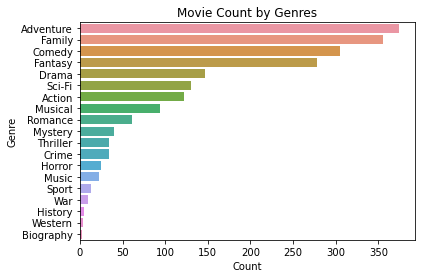

In [28]:
data_genre = {'genre':keys, 'count':vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
df_genre = pd.DataFrame(data=data_genre)

ax = sns.barplot(data = df_genre.sort_values("count", ascending=False), y="genre", x="count")

plt.xlabel('Count')
plt.ylabel("Genre")
plt.title('Movie Count by Genres')

plt.show()

<AxesSubplot:xlabel='votescore'>

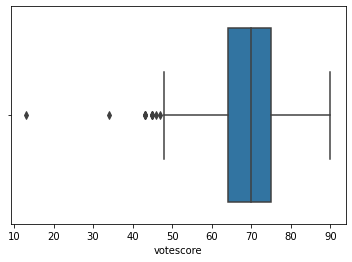

In [29]:
sns.boxplot(data=df, x="votescore")

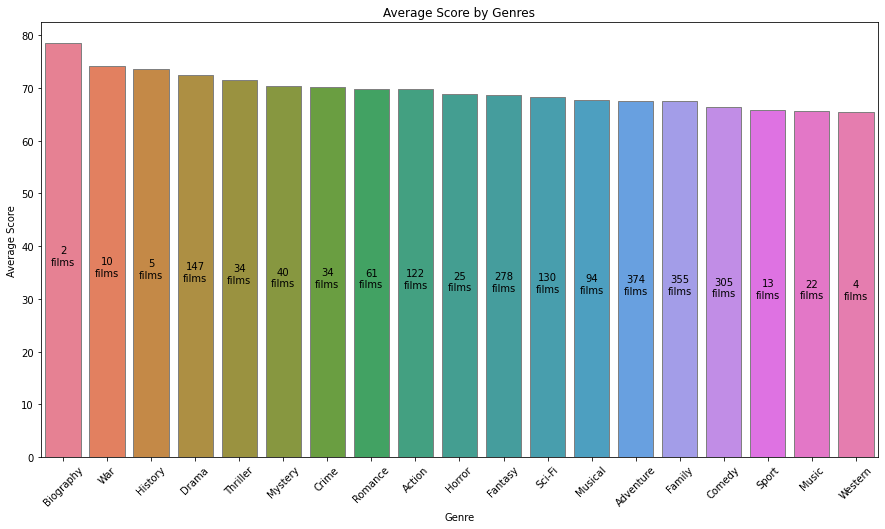

In [30]:
plt.figure(figsize = (15,8))
sorted_data_genre = df_genre.sort_values("avg_score", ascending=False)

ax = sns.barplot(data = sorted_data_genre, x="genre", y="avg_score", edgecolor = '.5',palette="husl",dodge=False)
# ax.get_legend().remove()

plt.xlabel('Genre')
plt.ylabel("Average Score")
plt.title('Average Score by Genres')

labels = [f"\n{x}\nfilms" for x in sorted_data_genre['count']]
plt.bar_label(ax.containers[-1],labels, label_type='center')

plt.tick_params(axis='x', rotation=45)
plt.show()

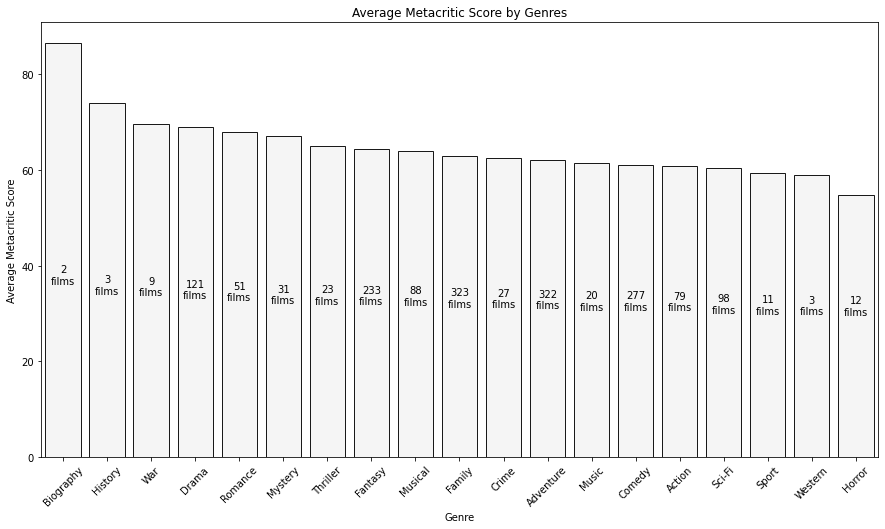

In [31]:
plt.figure(figsize = (15,8))
sorted_data_genre = df_genre.sort_values("avg_metacritic", ascending=False)

ax2 = sns.barplot(data = sorted_data_genre, x="genre", y="avg_metacritic", edgecolor = '.1', color="whitesmoke",dodge=False)
# ax2.get_legend().remove()
plt.xlabel('Genre')
plt.ylabel("Average Metacritic Score")
plt.title('Average Metacritic Score by Genres')

labels = [f"\n{x}\nfilms" for x in sorted_data_genre['count_mc']]
plt.bar_label(ax.containers[-1], labels = labels, label_type='center')

plt.tick_params(axis='x', rotation=45)
plt.show()

In [32]:
genre_misc = df.groupby(df[df['metacritic'] != -1]['genres']).mean()

In [33]:
genre_misc[{'votescore','metacritic'}].sort_values('votescore',ascending=False)

,metacritic,votescore
genres,,
"Adventure, Family, Fantasy, Mystery",96.0,86.0
"Drama, War",94.0,85.0
"Adventure, Family, Sci-Fi",95.0,84.0
"Adventure, Comedy, Family, Fantasy, Music, Mystery",81.0,84.0
"Action, Adventure, Fantasy, Thriller",72.0,82.0
...,...,...
"Comedy, Musical",23.0,53.0
"Adventure, Comedy, Family, Fantasy, Musical, Mystery, Romance",36.0,52.0
"Adventure, Comedy, Family, Fantasy, Music, Musical",32.0,48.0


In [34]:
genre_misc[{'votescore','metacritic'}].sort_values('metacritic',ascending=False)

,metacritic,votescore
genres,,
"Adventure, Family, Fantasy, Mystery",96.0,86.0
"Adventure, Family, Sci-Fi",95.0,84.0
"Drama, War",94.0,85.0
"Adventure, Comedy, Drama, Music, Sport",91.0,77.0
"Adventure, Family, Fantasy, Musical, Romance",90.5,74.0
...,...,...
"Adventure, Comedy, Family, Fantasy, Musical, Mystery, Romance",36.0,52.0
"Action, Adventure, Drama, Fantasy, Sci-Fi",35.0,67.0
"Comedy, Fantasy",34.0,48.0


In [35]:
for g in df_genre['genre']:
    df[f'genre_{g.lower()}'] = df['genres'].apply(lambda x: 1 if g in x.lower() else 0)
    
# df['genre_adventure'] = df['genres'].apply(lambda x: 1 if 'adventure' in x.lower() else 0)
# df['genre_family'] = df['genres'].apply(lambda x: 1 if 'family' in x.lower() else 0)
# df['genre_comedy'] = df['genres'].apply(lambda x: 1 if 'comedy' in x.lower() else 0)
# df['genre_fantasy'] = df['genres'].apply(lambda x: 1 if 'fantasy' in x.lower() else 0)
# df['genre_drama'] = df['genres'].apply(lambda x: 1 if 'drama' in x.lower() else 0)
# df['genre_scifi'] = df['genres'].apply(lambda x: 1 if 'sci-fi' in x.lower() else 0)
# df['genre_action'] = df['genres'].apply(lambda x: 1 if 'action' in x.lower() else 0)
# df['genre_musical'] = df['genres'].apply(lambda x: 1 if 'musical' in x.lower() else 0)
# df['genre_romance'] = df['genres'].apply(lambda x: 1 if 'romance' in x.lower() else 0)

### Genre Count (in other words, how many genres does a movie typically have?)

<AxesSubplot:xlabel='count', ylabel='genre_count'>

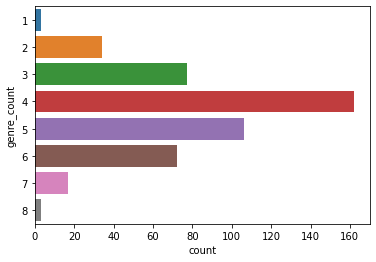

In [36]:
sns.countplot(y=num_df['genre_count'])

<AxesSubplot:xlabel='genre_count', ylabel='story_word_count'>

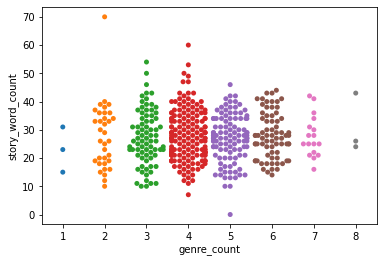

In [37]:
sns.swarmplot(y = df['story_word_count'], x = df['genre_count'])

<AxesSubplot:xlabel='genre_count', ylabel='votescore'>

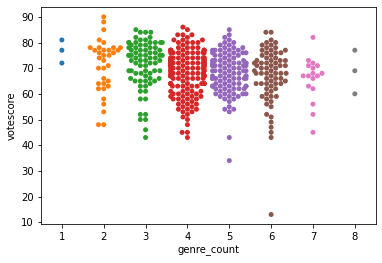

In [38]:
sns.swarmplot(y = df['votescore'], x = df['genre_count'])

In [39]:
df[{'genres','votescore'}].head(5)

,genres,votescore
0,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",70.0
1,"Adventure, Comedy, Family, Fantasy",72.0
2,"Adventure, Comedy, Drama, Family, Fantasy",68.0
3,"Adventure, Comedy, Family, Musical, Romance",69.0
4,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",70.0


# NEXT STEP: Story description

In [40]:
from wordcloud import WordCloud

In [41]:
stopwords = ''
with open("stop_words_english.txt") as t:
    stopwords = ' '.join(line for line in t).replace("\n","")

stopwords = stopwords.split()
stopwords.append('-')
stopwords.append('n/a')

In [42]:
story_words = df['story_desc'].str.lower().str.findall("[\w.\-']+").sum()

In [43]:
text = ' '.join(str(x) for x in story_words)

In [44]:
img_mask = np.array(Image.open("image_mask.png"))

In [45]:
def getFrequencyDict(words):
    temp = dataDict = {}

    # Dictionary counts frequencies
    for w in words:
        if w in stopwords:
            continue
        val = temp.get(w, 0)
        temp[w.lower()] = val + 1
    for key in temp:
        dataDict[key] = temp[key]
    
    return dataDict

In [46]:
freq_dict = getFrequencyDict(story_words)

In [47]:
w_keys = list(freq_dict.keys())
w_vals = [freq_dict[k] for k in w_keys]
    
data_wordfreq = {'word':w_keys, 'freq':w_vals}
df_wordfreq = pd.DataFrame(data=data_wordfreq, index=None)

In [48]:
df_wordfreq[df_wordfreq['freq'] > 10].sort_values("freq", ascending=False).head(15).style.hide_index()

word,freq
young,69
girl,38
save,37
boy,35
family,34
friends,27
named,23
life,23
man,22
set,22


In [49]:
df['desc_girl'] = df['story_desc'].apply(lambda x: 1 if 'girl' in x.lower() else 0)
df['desc_boy'] = df['story_desc'].apply(lambda x: 1 if 'boy' in x.lower() else 0)
df['desc_young'] = df['story_desc'].apply(lambda x: 1 if 'young' in x.lower() else 0)
df['desc_family'] = df['story_desc'].apply(lambda x: 1 if 'family' in x.lower() else 0)
df['desc_friend'] = df['story_desc'].apply(lambda x: 1 if 'friend' in x.lower() else 0)
df['desc_save'] = df['story_desc'].apply(lambda x: 1 if 'save' in x.lower() else 0)
df['desc_evil'] = df['story_desc'].apply(lambda x: 1 if 'evil' in x.lower() else 0)

In [50]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 12,
                margin = 11,
                mask=img_mask,
                contour_width=.5, contour_color='lightgray').generate(text)

In [51]:
import random
def grey_color_func(**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(75, 100)

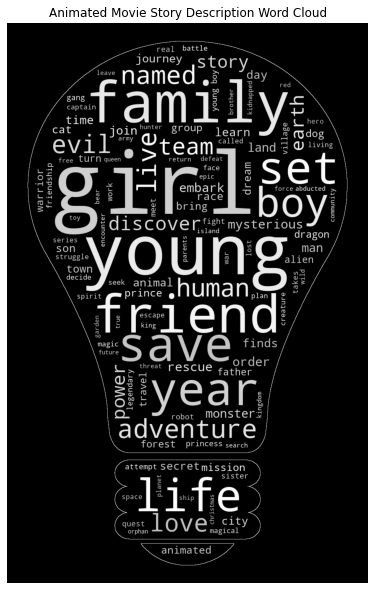

In [52]:
plt.figure(figsize = (10, 8), facecolor = "None")
plt.imshow(wordcloud.recolor(color_func=grey_color_func))
plt.axis("off")
plt.title("Animated Movie Story Description Word Cloud")
wordcloud.to_file("wordcloud.png")
plt.tight_layout(pad = 0)

plt.show()

### Production

In [53]:
df['production_companies']

0      Focus Features, Relativity Media, Arc Productions
1          Pixar Animation Studios, Walt Disney Pictures
2      Walt Disney Pictures, ImageMovers Digital, Ima...
3      Walt Disney Pictures, Disney Television Animat...
4      Warner Independent Pictures (WIP), Thousand Wo...
                             ...                        
469    Walt Disney Animation Studios, Walt Disney Pic...
470     Apple Corps, King Features Syndicate, TVC London
471    Warner Bros., Sunswept Entertainment, De Line ...
472    Walt Disney Pictures, Walt Disney Animation St...
473    Nippon Television Network (NTV), Studio Chizu,...
Name: production_companies, Length: 474, dtype: object

In [54]:
def getFreq(data):
    temp = dataDict = {}

    # Dictionary counts frequencies
    for c in data:
        for x in c.split(', '):
            val = temp.get(x.strip(), 0)
            temp[x] = val + 1
    for key in temp:
        dataDict[key] = temp[key]
    
    return dataDict

In [55]:
companies = getFreq(df['production_companies'])
# print(companies)

In [56]:
c_keys = list(companies.keys())
c_keys.sort()
c_vals = [companies[k] for k in c_keys]
    
comp_avg_score, comp_avg_mc, comp_b = avg_score_by_keys(df, 'production_companies', c_keys, False)

avgs_s = [comp_avg_score[k] for k in c_keys]
count_mc = [comp_b.get(k,0) for k in c_keys]
avgs_mc = [comp_avg_mc.get(k,-1) for k in c_keys]

# data_genre = {'genre':keys, 'count':vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
# df_genre = pd.DataFrame(data=data_genre)
    
data_company = {'company':c_keys, 'freq':c_vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
df_company = pd.DataFrame(data=data_company, index=None)

In [57]:
df_company = df_company.drop_duplicates(subset=['company'], keep="first")
df_company_b = df_company.query('count_mc > 3 & freq > 5')

In [58]:
df_company_b.sort_values("freq", ascending=False).head(10).style

,company,freq,avg_score,avg_metacritic,count_mc
482,Walt Disney Pictures,76,71.645000,70.743000,74
479,Walt Disney Animation Studios,57,71.596000,72.571000,56
152,DreamWorks Animation,41,68.366000,62.317000,41
350,Pixar Animation Studios,27,75.407000,78.185000,27
112,Columbia Pictures,24,63.875000,55.750000,24
135,Dentsu,19,72.158000,68.812000,16
469,Universal Pictures,18,66.111000,54.467000,15
404,Sony Pictures Animation,18,64.222000,55.529000,17
463,Twentieth Century Fox Animation,17,64.882000,53.353000,17
486,Warner Bros.,16,63.312000,60.688000,16


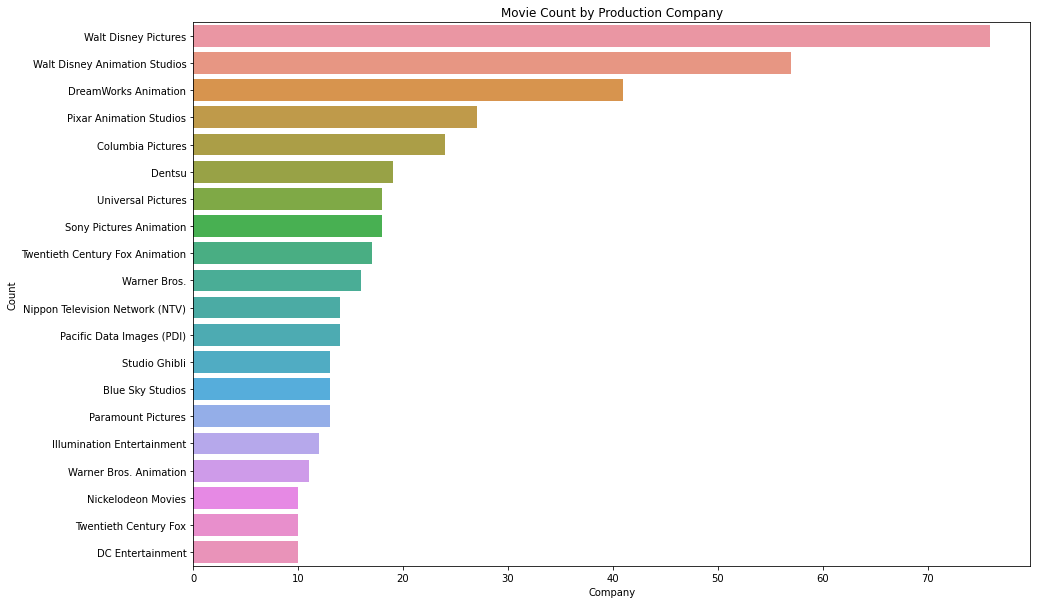

In [59]:
plt.figure(figsize = (15,10))
ax = sns.barplot(data = df_company.sort_values("freq", ascending=False).head(20), x="freq", y="company")

plt.xlabel('Company')
plt.ylabel("Count")
plt.title('Movie Count by Production Company')
# plt.tick_params(axis='x', rotation=90)
plt.show()

In [60]:
# sorted_data_comp.query('')

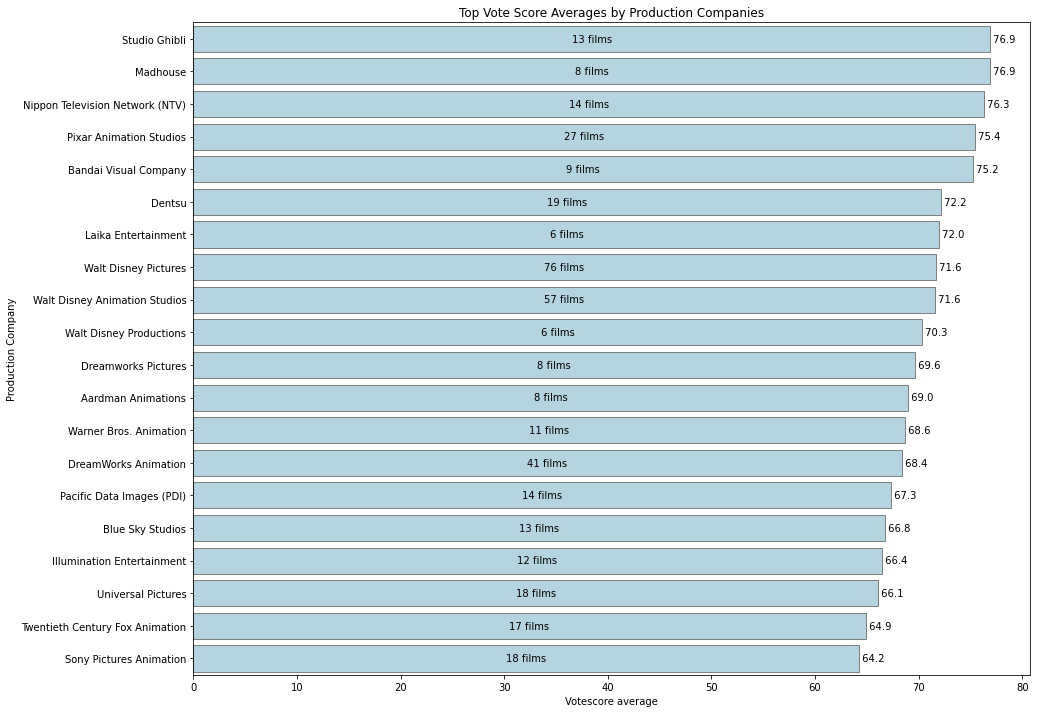

In [61]:
plt.figure(figsize = (15,12))
sorted_data_comp = df_company_b.sort_values("avg_score", ascending=False).head(20)

ax_c = sns.barplot(data = sorted_data_comp, y="company", x="avg_score", edgecolor = '.5', color="lightblue")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Top Vote Score Averages by Production Companies')

labels_a = [f"{x} films" for x in sorted_data_comp['freq']]
labels_b = [f" {round(b,1)}" for b in sorted_data_comp['avg_score']]

plt.bar_label(ax_c.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_c.containers[-1], labels = labels_b)

plt.show()

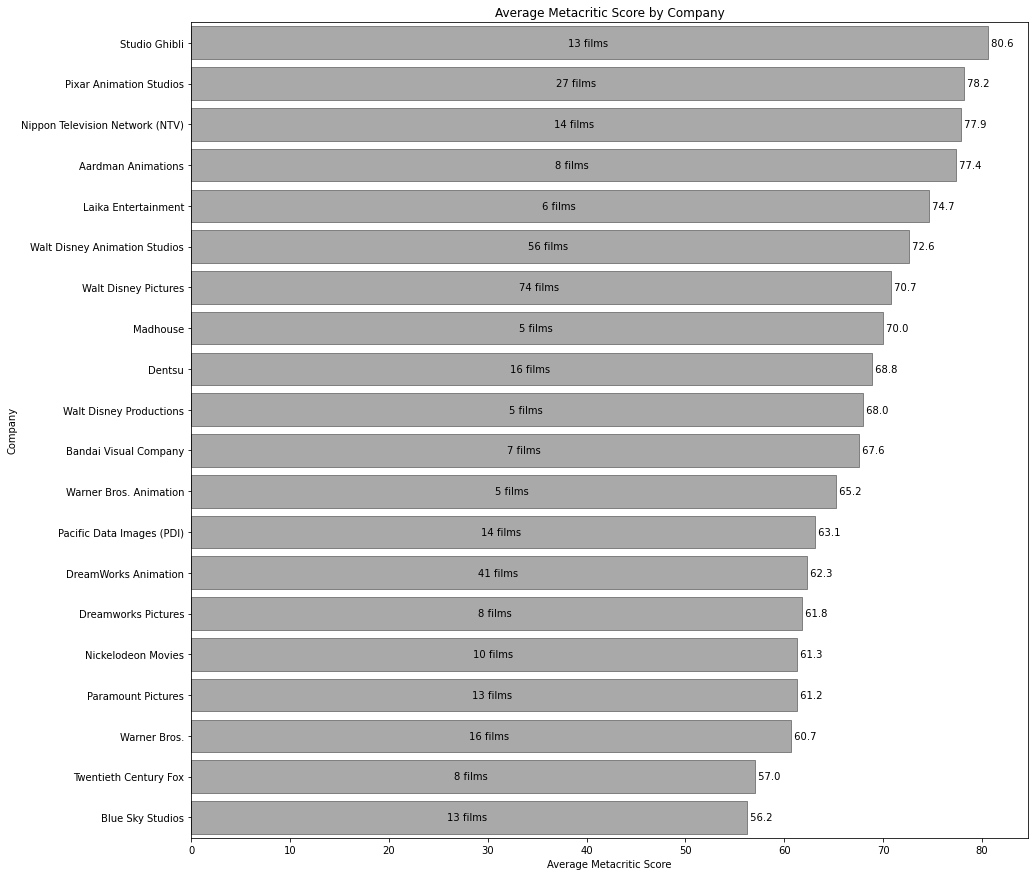

In [62]:
plt.figure(figsize = (15,15))
sorted_data_comp = df_company_b.sort_values("avg_metacritic", ascending=False).head(20)

ax2 = sns.barplot(data = sorted_data_comp, y="company", x="avg_metacritic", edgecolor = '.5', color='darkgray')
plt.ylabel('Company')
plt.xlabel("Average Metacritic Score")
plt.title('Average Metacritic Score by Company')

labels_a = [f"{a} films " for a in sorted_data_comp['count_mc']]
labels_b = [f" {round(b,1)}" for b in sorted_data_comp['avg_metacritic']]

plt.bar_label(ax2.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax2.containers[-1], labels = labels_b)

# plt.tick_params(axis='x', rotation=45)
plt.show()

In [63]:
major_comps = ['disney', 'pixar', 'dreamworks', 'columbia', 'dentsu', 'sony', 'universal', 'fox', 'ghibli', 'paramount']

In [64]:
df['company_disney'] = df['production_companies'].apply(lambda x: 1 if 'disney' in x.lower() else 0)
df['company_dreamworks'] = df['production_companies'].apply(lambda x: 1 if 'dreamworks' in x.lower() else 0)
df['company_pixar'] = df['production_companies'].apply(lambda x: 1 if 'pixar' in x.lower() else 0)
df['company_columbia'] = df['production_companies'].apply(lambda x: 1 if 'columbia pictures' in x.lower() else 0)
df['company_dentsu'] = df['production_companies'].apply(lambda x: 1 if 'dentsu' in x.lower() else 0)
df['company_sony'] = df['production_companies'].apply(lambda x: 1 if 'sony' in x.lower() else 0)
df['company_universal'] = df['production_companies'].apply(lambda x: 1 if 'universal' in x.lower() else 0)
df['company_fox'] = df['production_companies'].apply(lambda x: 1 if 'fox' in x.lower() else 0)
df['company_ghibli'] = df['production_companies'].apply(lambda x: 1 if 'studio ghibli' in x.lower() else 0)
df['company_paramount'] = df['production_companies'].apply(lambda x: 1 if 'paramount' in x.lower() else 0)

df.insert(len(df.columns),'company_other',-1)
for w in range(len(df)):
    flag = False
    for x in major_comps:
        if df[f'company_{x}'][w] == 1:
            flag = True
            
    if flag:
        df['company_other'][w] = 0
    else:
        df['company_other'][w] = 1


In [65]:
df[df['company_other'] == 0][{'production_companies','company_other'}].head(10)

,production_companies,company_other
1,"Pixar Animation Studios, Walt Disney Pictures",0
2,"Walt Disney Pictures, ImageMovers Digital, Ima...",0
3,"Walt Disney Pictures, Disney Television Animat...",0
6,"DreamWorks Animation, Pearl Studio, China Film...",0
8,"Walt Disney Pictures, Silver Screen Partners I...",0
9,Walt Disney Animation Studios,0
12,"Fox 2000 Pictures, New Regency Productions, Ba...",0
13,"Fox 2000 Pictures, New Regency Productions, Ba...",0
14,"Fox 2000 Pictures, New Regency Productions, Ba...",0
15,"Fox 2000 Pictures, New Regency Productions, Ba...",0


In [66]:
df[df['company_other'] == 1][{'production_companies','company_other'}].head(5)

,production_companies,company_other
0,"Focus Features, Relativity Media, Arc Productions",1
4,"Warner Independent Pictures (WIP), Thousand Wo...",1
5,"Aardman Animations, Amazon Prime Video, Anton",1
7,"Akira Committee Company Ltd., Akira Studio, TM...",1
10,"Goldcrest Films International, Don Bluth Produ...",1


### Aspect ratio

In [67]:
df['aspect_ratio'] = df['aspect_ratio'].str.replace(" ", "")

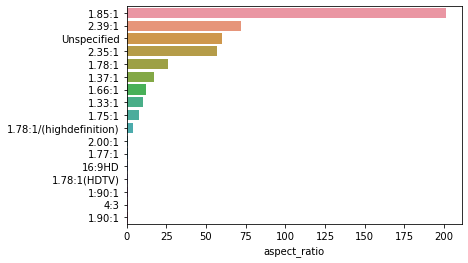

In [68]:
sns.barplot(y=df['aspect_ratio'].value_counts().index, x=df['aspect_ratio'].value_counts())
plt.tick_params(axis='x', rotation=0)
plt.show()

# NEXT STEP: Work more on countries

In [69]:
df['production_countries'].unique

<bound method Series.unique of 0             United States, Canada, Luxembourg
1                                 United States
2                                 United States
3      United States, Australia, France, Canada
4                                 United States
                         ...                   
469                               United States
470               United Kingdom, United States
471                  United States, New Zealand
472                               United States
473                                       Japan
Name: production_countries, Length: 474, dtype: object>

In [70]:
def getFreqCountry(data):
    temp = dataDict = {}

    # Dictionary counts frequencies
    for c in data:
        for x in c.split(', '):
            if "germany" in x.lower():
                val = temp.get("Germany", 0)
                temp["Germany"] = val + 1
                continue
                
            elif "czech" in x.lower():
                val = temp.get("Czechoslovakia", 0)
                temp["Czechoslovakia"] = val + 1
                continue
                
            val = temp.get(x.strip(), 0)
            temp[x] = val + 1
    for key in temp:
        dataDict[key] = temp[key]
    
    return dataDict

In [71]:
countries = getFreqCountry(df['production_countries'])

In [72]:
countries

{'United States': 354,
 'Canada': 28,
 'Luxembourg': 8,
 'Australia': 17,
 'France': 43,
 'United Kingdom': 48,
 'Belgium': 17,
 'China': 8,
 'Japan': 111,
 'Ireland': 7,
 'India': 4,
 'Finland': 2,
 'Hong Kong': 6,
 'Denmark': 9,
 'Germany': 14,
 'United Arab Emirates': 1,
 'Taiwan': 1,
 'Norway': 2,
 'Mexico': 2,
 'Serbia and Montenegro': 1,
 'South Korea': 5,
 'Spain': 6,
 'Czechoslovakia': 3,
 'Italy': 2,
 'Latvia': 1,
 'Poland': 2,
 'Switzerland': 3,
 'Netherlands': 1,
 'Hungary': 1,
 'New Zealand': 2,
 'Israel': 1}

In [73]:
# countries['Germany'] += countries.get("West Germany")
# del countries['West Germany']

In [74]:
# round(df[df['production_countries'].str.contains("Czech")]['votescore'].mean(),3)
df[df['metacritic'] > 0][df['production_countries'].str.contains("Czech")]['metacritic']

210    73.0
322    40.0
Name: metacritic, dtype: float64

In [75]:
country_keys = list(countries.keys())
country_keys.sort()

country_vals = [countries[k] for k in country_keys]
    
country_avg_score, country_avg_mc, count_c = avg_score_by_keys(df, 'production_countries', country_keys)

# Merging various countries:
country_avg_score['Czechoslovakia'] = round(df[df['production_countries'].str.contains("Czech")]['votescore'].mean(),3)
country_avg_mc['Czechoslovakia'] = round(df[df['metacritic'] > 0][df['production_countries'].str.contains("Czech")]['metacritic'].mean(),3)
count_c['Czechoslovakia'] = len(df[df['metacritic'] > 0][df['production_countries'].str.contains("Czech")]['metacritic'])

avgs_s = [country_avg_score[k] for k in country_keys]
count_mc = [count_c.get(k,0) for k in country_keys]
avgs_mc = [country_avg_mc.get(k,-1) for k in country_keys]
    
data_country = {'country':country_keys, 'freq':country_vals, 'avg_score': avgs_s, 'avg_metacritic': avgs_mc, 'count_mc': count_mc}
df_country = pd.DataFrame(data=data_country, index=None)

In [76]:
df_country = df_country.drop_duplicates(subset=['country'], keep="first")

<AxesSubplot:xlabel='freq', ylabel='country'>

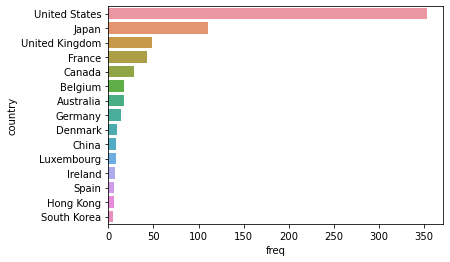

In [77]:
sns.barplot(data=df_country.sort_values("freq", ascending=False).head(15),y='country',x='freq')

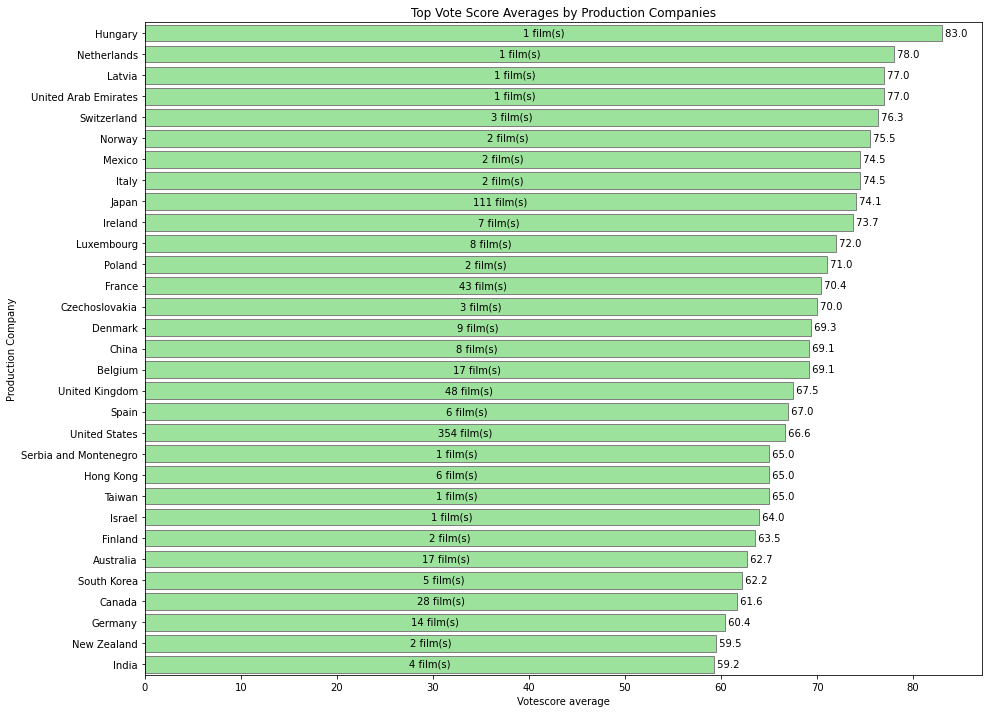

In [78]:
plt.figure(figsize = (15,12))
sorted_data_country = df_country.sort_values("avg_score", ascending=False)

ax_ctry = sns.barplot(data = sorted_data_country, y="country", x="avg_score", edgecolor = '.5', color="lightgreen")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Top Vote Score Averages by Production Companies')

labels_a = [f"{x} film(s)" for x in sorted_data_country['freq']]
labels_b = [f" {round(b,1)}" for b in sorted_data_country['avg_score']]

plt.bar_label(ax_ctry.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_ctry.containers[-1], labels = labels_b)

plt.show()

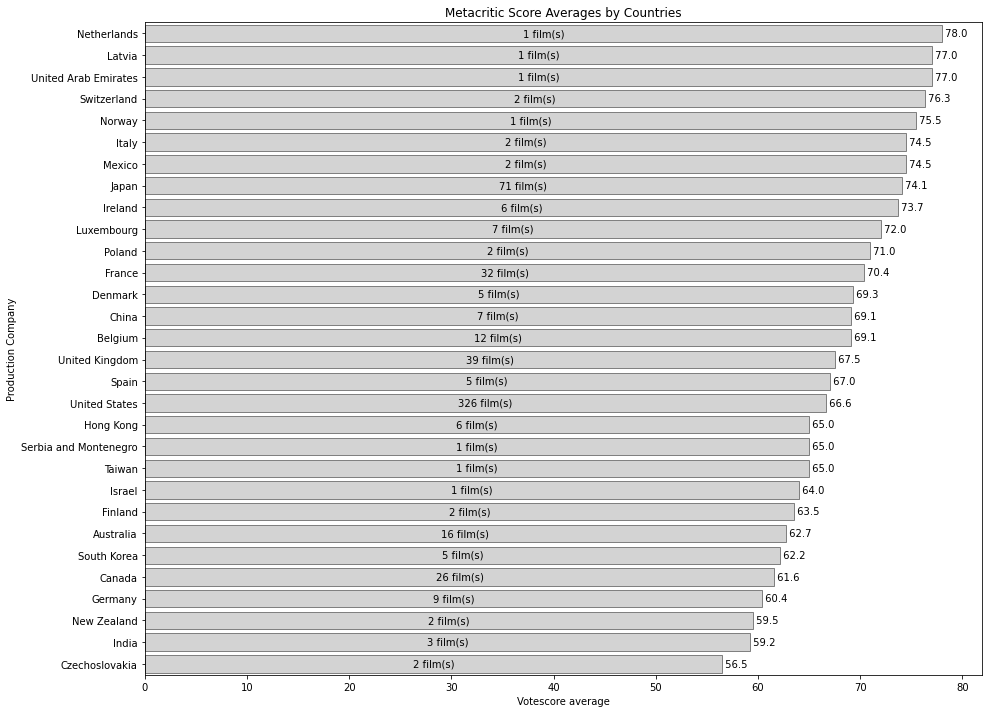

In [79]:
plt.figure(figsize = (15,12))
sorted_data_country = df_country.sort_values("avg_metacritic", ascending=False).query('avg_metacritic > 0')

ax_ctry = sns.barplot(data = sorted_data_country, y="country", x="avg_metacritic", edgecolor = '.5', color="lightgray")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Metacritic Score Averages by Countries')

labels_a = [f"{x} film(s)" for x in sorted_data_country['count_mc']]
labels_b = [f" {round(b,1)}" for b in sorted_data_country['avg_metacritic']]

plt.bar_label(ax_ctry.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_ctry.containers[-1], labels = labels_b)

plt.show()

# Continent

In [80]:
# Source: https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        if "czech" in country_name.lower():
            country_name = "Czechia"
        if "serbia" in country_name.lower():
            country_name = "Serbia"
        if "germany" in country_name.lower():
            country_name = "Germany"
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except KeyError:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name.split()[0])
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_country['continent'] = df_country['country'].apply(country_to_continent)

In [81]:
df_country[{'country','continent','freq'}]

,freq,country,continent
0,17,Australia,Oceania
1,17,Belgium,Europe
2,28,Canada,North America
3,8,China,Asia
4,3,Czechoslovakia,Europe
5,9,Denmark,Europe
6,2,Finland,Europe
7,43,France,Europe
8,14,Germany,Europe
9,6,Hong Kong,Asia


In [82]:
def make_df(data, counted_col, count_by_one=True, y="freq",):
    temp = dataDict = {}

    # Dictionary counts frequencies
    if count_by_one:
        for c in data:
            try:
                for x in c.split(', '):
                    if x == "":
                        continue
                    val = temp.get(x.strip(), 0)
                    temp[x] = val + 1
            except AttributeError:
                    val = temp.get("Uncredited", 0)
                    temp[x] = val + 1
        for key in temp:
            dataDict[key] = temp[key]
    else:
        for i in range(len(data)):
            val = temp.get(data[counted_col][i], 0)
            temp[data[counted_col][i]] = val + data[y][i]
        for key in temp:
            dataDict[key] = temp[key]

    keys = list(dataDict.keys())
    vals = [dataDict[k] for k in keys]

    data_final = {counted_col:keys, y:vals}
    df_final = pd.DataFrame(data=data_final, index=None)
    
    return df_final

In [83]:
df_cont = make_df(df_country, 'continent', False)

In [84]:
df_cont

,continent,freq
0,Oceania,19
1,Europe,170
2,North America,384
3,Asia,137


<AxesSubplot:xlabel='continent', ylabel='freq'>

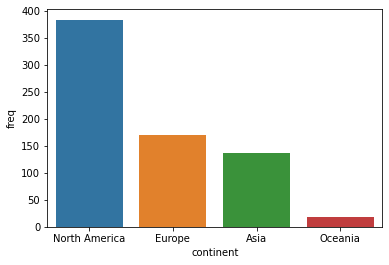

In [85]:
sns.barplot(data=df_cont.sort_values("freq",ascending=False), x='continent', y='freq')

In [86]:
def check_continents(data):
    cont_list = set()
    for x in data.split(', '):
#         print(x)
        val = country_to_continent(x)
#         print(val)
        cont_list.add(val) 
    return cont_list

In [87]:
df['continent_namerica'] = df['production_countries'].apply(lambda x: 1 if "North America" in check_continents(x) else 0)
df['continent_europe'] = df['production_countries'].apply(lambda x: 1 if "Europe" in check_continents(x) else 0)
df['continent_asia'] = df['production_countries'].apply(lambda x: 1 if "Asia" in check_continents(x) else 0)
df['continent_oceania'] = df['production_countries'].apply(lambda x: 1 if "Oceania" in check_continents(x) else 0)

In [88]:
df.head(5)

,name,rating,year,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,...,company_sony,company_universal,company_fox,company_ghibli,company_paramount,company_other,continent_namerica,continent_europe,continent_asia,continent_oceania
0,9,PG-13,2009,79,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",6,A rag doll that awakens in a postapocalyptic f...,15,65.0,70.0,...,0,0,0,0,0,1,1,1,0,0
1,A Bug's Life,G,1998,95,"Adventure, Comedy, Family, Fantasy",4,"A misfit ant, looking for ""warriors"" to save h...",27,74.5,72.0,...,0,0,0,0,0,0,1,0,0,0
2,A Christmas Carol,PG,2009,96,"Adventure, Comedy, Drama, Family, Fantasy",5,An animated retelling of Charles Dickens' clas...,24,61.5,68.0,...,0,0,0,0,0,0,1,0,0,0
3,A Goofy Movie,G,1995,78,"Adventure, Comedy, Family, Musical, Romance",5,When Max makes a preposterous promise to a gir...,34,61.0,69.0,...,0,0,0,0,0,0,1,1,0,1
4,A Scanner Darkly,R,2006,100,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",6,An undercover cop in a not-too-distant future ...,24,71.5,70.0,...,0,0,0,0,0,1,1,0,0,0


### Language and Country

<AxesSubplot:xlabel='country_count', ylabel='language_count'>

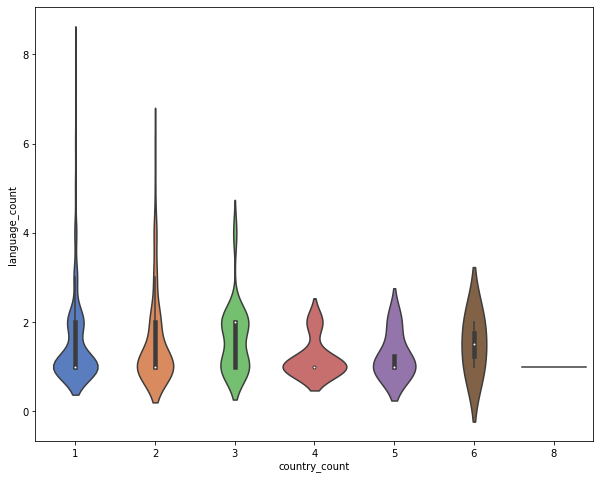

In [89]:
plt.figure(figsize = (10,8))
sns.violinplot(data=df, x="country_count",
                y="language_count", palette="muted")

<AxesSubplot:xlabel='language_count', ylabel='count'>

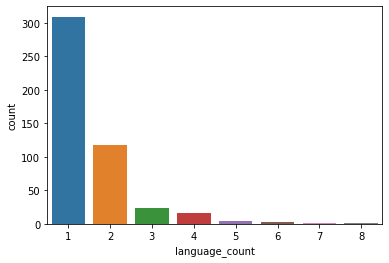

In [90]:
sns.countplot(data=df,x="language_count")

In [91]:
df_lang = make_df(df['languages'], 'languages', True)

<AxesSubplot:xlabel='freq', ylabel='languages'>

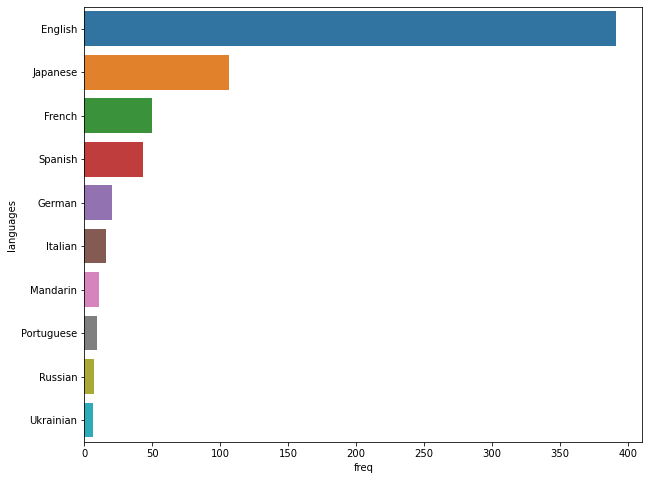

In [92]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_lang.sort_values("freq",ascending=False).head(10),y='languages',x='freq')

In [93]:
df['lang_english'] = df['languages'].apply(lambda x: 1 if "English" in x else 0)
df['lang_japanese'] = df['languages'].apply(lambda x: 1 if "Japanese" in x else 0)
df['lang_french'] = df['languages'].apply(lambda x: 1 if "French" in x else 0)
df['lang_spanish'] = df['languages'].apply(lambda x: 1 if "Spanish" in x else 0)
df['lang_german'] = df['languages'].apply(lambda x: 1 if "German" in x else 0)

# Director / Writers

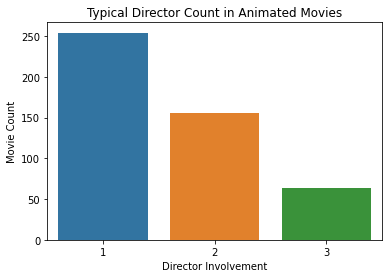

In [94]:
sns.countplot(data=df.sort_values("director_count",ascending=False), x='director_count')
plt.title('Typical Director Count in Animated Movies')
plt.ylabel('Movie Count')
plt.xlabel('Director Involvement')
plt.show()

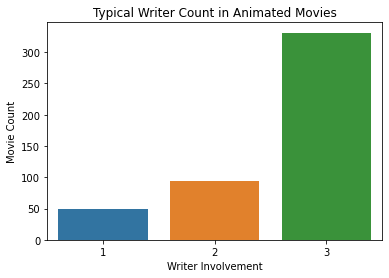

In [95]:
sns.countplot(data=df.sort_values("writer_count",ascending=False), x='writer_count')
plt.title('Typical Writer Count in Animated Movies')
plt.ylabel('Movie Count')
plt.xlabel('Writer Involvement')
plt.show()

In [96]:
df[df.writer_count == 4]

,name,rating,year,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,...,company_other,continent_namerica,continent_europe,continent_asia,continent_oceania,lang_english,lang_japanese,lang_french,lang_spanish,lang_german


In [97]:
df_dir = make_df(df['directors'], 'director', True)

In [98]:
df_wri = make_df(df['writers'], 'writer', True)

In [99]:
# df_dir[df_dir.director == ""]

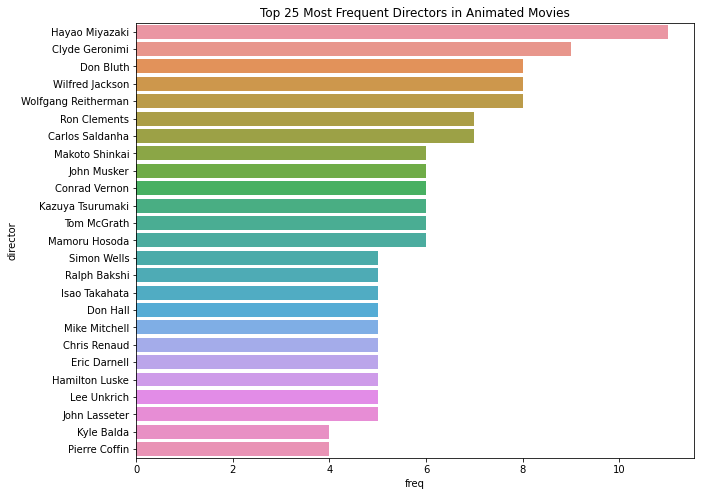

In [100]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_dir.sort_values("freq",ascending=False).head(25), x="freq", y="director")
plt.title('Top 25 Most Frequent Directors in Animated Movies')
plt.show()

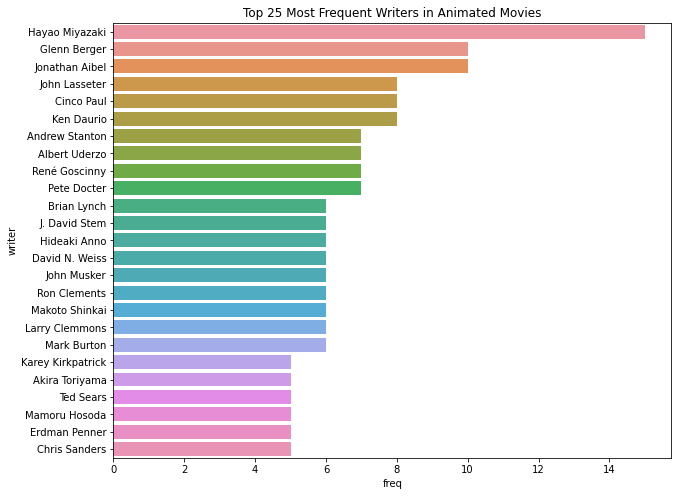

In [101]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_wri.sort_values("freq",ascending=False).head(25), x="freq", y="writer")
plt.title('Top 25 Most Frequent Writers in Animated Movies')
plt.show()

### Box Office

In [102]:
a = df.groupby(df[df['box_office'] > 0]['year']).budget_est_usd.median()

In [103]:
b = df.groupby(df[df['box_office'] > 0]['year']).profit_usd.median()

In [104]:
c = df.groupby(df[df['box_office'] > 0]['year']).worldwide_gross_usd.median()

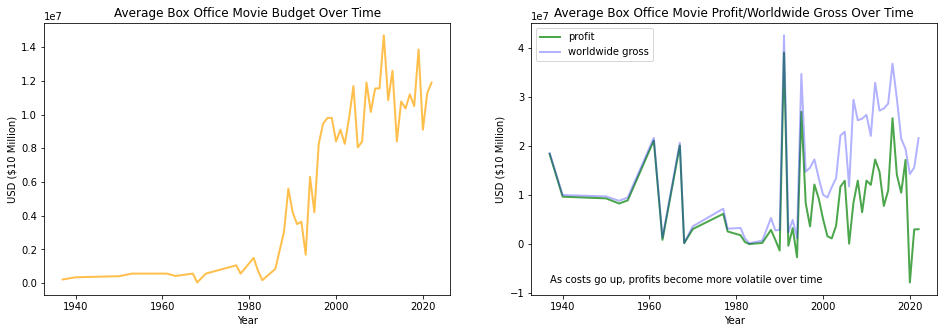

In [105]:
years = a.index.astype(int)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(years, a.values.astype(float).round(2), lw=2, color="orange", alpha=0.7, label="budget")
axes[1].plot(years, b.values.astype(float).round(2), lw=2, color="green", alpha=.7, label="profit")
axes[1].plot(years, c.values.astype(float).round(2), lw=2, color="blue", alpha=.3, label="worldwide gross")

axes[0].set_title("Average Box Office Movie Budget Over Time")
axes[1].set_title("Average Box Office Movie Profit/Worldwide Gross Over Time")

axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")

axes[0].set_ylabel("USD ($10 Million)")
axes[1].set_ylabel("USD ($10 Million)")

axes[1].annotate("As costs go up, profits become more volatile over time",
            xy=(550, 50), xycoords='figure pixels')

plt.legend(loc="upper left")
plt.show()


In [106]:
r = df.groupby(df['year']).runtime_minutes.mean().astype(float).round(2)
bpm = df.groupby(df['year']).avg_usd_budget_per_minute.median().astype(float).round(2)

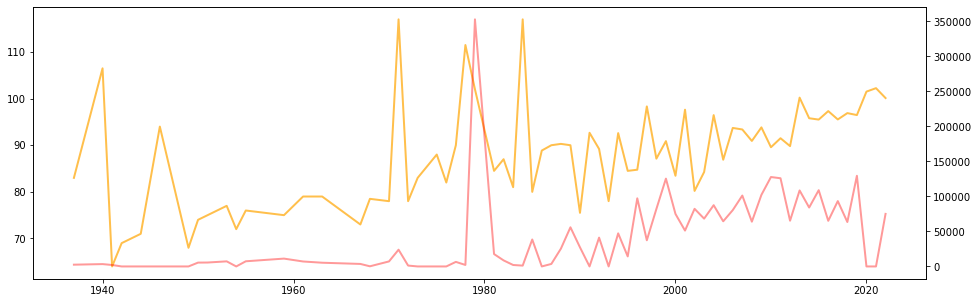

In [107]:
fig, ax = plt.subplots(figsize=(16, 5))
ax2 = ax.twinx()

ax.plot(r.index, r.values.astype(float).round(2), lw=2, color="orange", alpha=0.7, label="runtime")
ax2.plot(bpm.index, bpm.values.astype(float).round(2), lw=2, color="red", alpha=0.4, label="runtime")

# Votescore / Metacritic

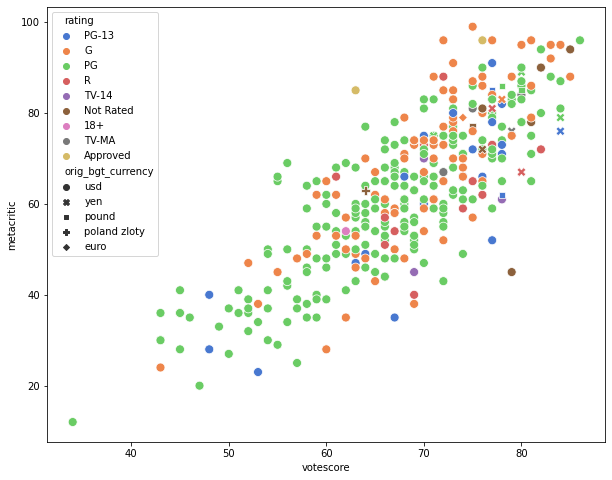

In [108]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df[df['metacritic'] != -1], y="metacritic" ,x="votescore",
                s=80,hue="rating", palette="muted", style="orig_bgt_currency")
plt.show()

In [109]:
score_cols = ['name','avg_rating_score','metacritic','votescore','votes']
print("Worst movies by votescore")
df[score_cols].sort_values("votescore", ascending=True).head(6).style.hide_index()

Worst movies by votescore


name,avg_rating_score,metacritic,votescore,votes
Foodfight!,13.000000,-1.000000,13.000000,11128
The Emoji Movie,23.000000,12.000000,34.000000,65447
Cats & Dogs: The Revenge of Kitty Galore,36.500000,30.000000,43.000000,15479
The Adventures of Rocky & Bullwinkle,39.500000,36.000000,43.000000,20528
The Ice Age Adventures of Buck Wild,36.500000,30.000000,43.000000,13994
Alvin and the Chipmunks: Chipwrecked,33.500000,24.000000,43.000000,36291


In [110]:
df[df['metacritic'] != -1.0][score_cols].sort_values("metacritic", ascending=True).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
The Emoji Movie,23.000000,12.000000,34.000000,65447
Hoodwinked 2: Hood vs. Evil,33.500000,20.000000,47.000000,13302
Eight Crazy Nights,38.000000,23.000000,53.000000,23824
Alvin and the Chipmunks: Chipwrecked,33.500000,24.000000,43.000000,36291
Strange Magic,41.000000,25.000000,57.000000,11458


In [111]:
df[score_cols].sort_values("votescore", ascending=False).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansion Arc,90.000000,-1.000000,90.000000,14872
Demon Slayer: Kimetsu no Yaiba - Mt. Natagumo Arc,88.000000,-1.000000,88.000000,11729
Spirited Away,91.000000,96.000000,86.000000,765087
Attack on Titan: Chronicle,85.000000,-1.000000,85.000000,10534
The Lion King,86.500000,88.000000,85.000000,1059615


In [112]:
print("Best movies by votescore")
df[df['metacritic'] != -1.0][score_cols].sort_values("votescore", ascending=False).head(5).style.hide_index()

Best movies by votescore


name,avg_rating_score,metacritic,votescore,votes
Spirited Away,91.000000,96.000000,86.000000,765087
Grave of the Fireflies,89.500000,94.000000,85.000000,279025
The Lion King,86.500000,88.000000,85.000000,1059615
Coco,82.500000,81.000000,84.000000,510512
Spider-Man: Into the Spider-Verse,85.500000,87.000000,84.000000,531526


In [113]:
df[df['metacritic'] != -1.0][score_cols].sort_values("metacritic", ascending=False).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
Pinocchio,87.000000,99.000000,75.000000,149397
Dumbo,84.000000,96.000000,72.000000,133788
Snow White and the Seven Dwarfs,86.000000,96.000000,76.000000,201683
Ratatouille,88.500000,96.000000,81.000000,739989
Fantasia,86.500000,96.000000,77.000000,97874


# END

In [114]:
df.columns

Index(['name', 'rating', 'year', 'runtime_minutes', 'genres', 'genre_count',
       'story_desc', 'story_word_count', 'avg_rating_score', 'votescore',
       'metacritic', 'prod_company_count', 'production_companies',
       'aspect_ratio', 'production_countries', 'country_count', 'languages',
       'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'orig_bgt_currency', 'profit_usd', 'directors',
       'director_count', 'writers', 'writer_count', 'box_office',
       'genre_action', 'genre_adventure', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_drama', 'genre_family', 'genre_fantasy',
       'genre_history', 'genre_horror', 'genre_music', 'genre_musical',
       'genre_mystery', 'genre_romance', 'genre_sci-fi', 'genre_sport',
       'genre_thriller', 'genre_war', 'genre_western', 'desc_girl', 'desc_boy',
       'desc_young', 'desc_family', 'desc_friend', 'desc_save',

In [115]:
df.to_csv("imdb_eda.csv", index = False)